In [316]:
import pandas as pd
import requests
import glob
import json
import requests
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [317]:
# Read CSV files from the location
#C:\Users\LENOVO\Downloads\guvi\Final

df_file1 = pd.read_csv("C:/Users/LENOVO/Downloads/guvi/Final/stores_data_set.csv")
df_file1

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [318]:
df_file1.dtypes

Store     int64
Type     object
Size      int64
dtype: object

In [319]:
df_file1.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [320]:
df_file2 = pd.read_csv("C:/Users/LENOVO/Downloads/guvi/Final/sales_data_set.csv")
df_file2

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [321]:
df_file2.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [322]:
df_file2.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [323]:
df_file3 = pd.read_csv("C:/Users/LENOVO/Downloads/guvi/Final/Features_data_set.csv")
df_file3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [324]:
df_file3.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [325]:
df_file3.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [326]:
col_name = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']
medians = df_file3[col_name].median()

In [327]:
medians

MarkDown1       4743.580000
MarkDown2        364.570000
MarkDown3         36.260000
MarkDown4       1176.425000
MarkDown5       2727.135000
CPI              182.764003
Unemployment       7.806000
dtype: float64

In [328]:
#df_file3[col_name] = np.where(df_file3[col_name] == medians, np.NaN, df_file3[col_name])

#df_file3[col_name] = df_file3[col_name].apply(lambda col: col.mask(col == medians, np.NaN))

#df_file3[col_name] = df_file3[col_name].isin(medians.index).applymap(lambda x: np.NaN if x else x)

#df_file3[col_name] = df_file3[col_name].applymap(lambda x: np.nan if x in medians[x.name].values else x)

#df_file3[col_name] = df_file3[col_name].isin(medians).applymap(lambda x: np.NaN if x else np.NaN)


In [329]:
df_file3['MarkDown1'].fillna(int(df_file3['MarkDown1'].median()),inplace=True)
df_file3['MarkDown2'].fillna(int(df_file3['MarkDown2'].median()),inplace=True)
df_file3['MarkDown3'].fillna(int(df_file3['MarkDown3'].median()),inplace=True)
df_file3['MarkDown4'].fillna(int(df_file3['MarkDown4'].median()),inplace=True)
df_file3['MarkDown5'].fillna(int(df_file3['MarkDown5'].median()),inplace=True)
df_file3['CPI'].fillna(int(df_file3['CPI'].median()),inplace=True)
df_file3['Unemployment'].fillna(int(df_file3['Unemployment'].median()),inplace=True)


In [330]:
df_file3

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,False


In [331]:
df_file3.isnull().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [332]:
df_file3.dtypes

Store             int64
Date             object
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
dtype: object

In [333]:
# df_file 1, df_file 2, df_file 3


merge_df = pd.merge( df_file1,df_file3, on='Store',how='inner')

merge_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,False


In [334]:
merge_df.isnull().sum()

Store           0
Type            0
Size            0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [335]:
# FINAL DATASET 
#data3 =  pd.DataFrame(merge_df)  on=['store', 'date', 'holiday'], how='inner'

#combine_df = pd.merge(merge_df,df_file2, on=['Store'],how ='inner')

#combine_df


In [336]:
#df = combine_df.drop(['', 'column2_df2'], axis=1)

#combine_df.isnull().sum()

In [337]:
#combine_df.dtypes

In [338]:
# FINAL DATA

#final_df = pd.DataFrame(combine_df)
#final_df = pd.to_datetime(final_df['Date'])
final_df = merge_df.copy()
final_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,05/02/2010,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,False
1,1,A,151315,12/02/2010,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True
2,1,A,151315,19/02/2010,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,False
3,1,A,151315,26/02/2010,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,False
4,1,A,151315,05/03/2010,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,False
8186,45,B,118221,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,False
8187,45,B,118221,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,False
8188,45,B,118221,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,False


In [339]:
final_df['Date'] = pd.to_datetime(final_df['Date'],format = '%d/%m/%Y')

In [340]:
final_df.dtypes

Store                    int64
Type                    object
Size                     int64
Date            datetime64[ns]
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
dtype: object

In [341]:
final_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,A,151315,2010-02-05,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,False
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True
2,1,A,151315,2010-02-19,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,False
3,1,A,151315,2010-02-26,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,False
4,1,A,151315,2010-03-05,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,False
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,False
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,False
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,False


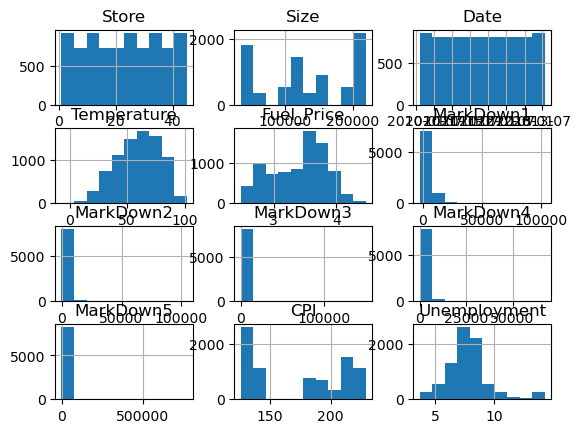

In [342]:
import matplotlib.pyplot as plt

final_df.hist()
plt.show()

In [147]:
#
#df = pd.DataFrame(final_df)

#group_data = df.groupby(['Store','Dept']).agg({'Temperature' : 'median'}).reset_index()
#group_data

In [343]:
final_df['Date'] = pd.to_datetime(final_df['Date'], format = '%d/%m/%Y')
final_df['Week_Number'] = final_df['Date'].dt.isocalendar().week
#final_df['Date'].min(), final_df['Date'].max()


In [207]:
final_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,False,5
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True,6
2,1,A,151315,2010-02-19,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,False,7
3,1,A,151315,2010-02-26,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,False,8
4,1,A,151315,2010-03-05,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,False,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,False,26
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,False,27
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,False,28
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,False,29


In [344]:
final_df = final_df.drop_duplicates()


In [345]:
#final_df['Week_Number'].value_counts()
holiday_df = final_df[final_df['IsHoliday'] == True]
#print(holiday_df['Date'].unique())
holiday_df 

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True,6
31,1,A,151315,2010-09-10,78.69,2.565,4743.00,364.00,36.00,1176.00,2727.00,211.495190,7.787,True,36
42,1,A,151315,2010-11-26,64.52,2.735,4743.00,364.00,36.00,1176.00,2727.00,211.748433,7.838,True,47
47,1,A,151315,2010-12-31,48.43,2.943,4743.00,364.00,36.00,1176.00,2727.00,211.404932,7.838,True,52
53,1,A,151315,2011-02-11,36.39,3.022,4743.00,364.00,36.00,1176.00,2727.00,212.936705,7.742,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,45,B,118221,2012-02-10,37.00,3.640,15760.30,6113.95,5.43,5656.35,4685.58,189.707605,8.424,True,6
8143,45,B,118221,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True,36
8154,45,B,118221,2012-11-23,43.08,3.748,1005.79,364.00,72542.01,484.70,620.12,192.283032,8.667,True,47
8159,45,B,118221,2012-12-28,35.96,3.563,12751.77,24656.74,230.07,31.46,1654.14,192.559264,8.667,True,52


In [346]:
holiday_df['Week_Number'].value_counts()

6     180
36    135
47    135
52    135
Name: Week_Number, dtype: Int64

In [347]:
print(holiday_df['Date'].unique())
holiday_df 

['2010-02-12T00:00:00.000000000' '2010-09-10T00:00:00.000000000'
 '2010-11-26T00:00:00.000000000' '2010-12-31T00:00:00.000000000'
 '2011-02-11T00:00:00.000000000' '2011-09-09T00:00:00.000000000'
 '2011-11-25T00:00:00.000000000' '2011-12-30T00:00:00.000000000'
 '2012-02-10T00:00:00.000000000' '2012-09-07T00:00:00.000000000'
 '2012-11-23T00:00:00.000000000' '2012-12-28T00:00:00.000000000'
 '2013-02-08T00:00:00.000000000']


,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,True,6
31,1,A,151315,2010-09-10,78.69,2.565,4743.00,364.00,36.00,1176.00,2727.00,211.495190,7.787,True,36
42,1,A,151315,2010-11-26,64.52,2.735,4743.00,364.00,36.00,1176.00,2727.00,211.748433,7.838,True,47
47,1,A,151315,2010-12-31,48.43,2.943,4743.00,364.00,36.00,1176.00,2727.00,211.404932,7.838,True,52
53,1,A,151315,2011-02-11,36.39,3.022,4743.00,364.00,36.00,1176.00,2727.00,212.936705,7.742,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,45,B,118221,2012-02-10,37.00,3.640,15760.30,6113.95,5.43,5656.35,4685.58,189.707605,8.424,True,6
8143,45,B,118221,2012-09-07,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,191.577676,8.684,True,36
8154,45,B,118221,2012-11-23,43.08,3.748,1005.79,364.00,72542.01,484.70,620.12,192.283032,8.667,True,47
8159,45,B,118221,2012-12-28,35.96,3.563,12751.77,24656.74,230.07,31.46,1654.14,192.559264,8.667,True,52


In [348]:
holiday_df['Date'].unique()

array(['2010-02-12T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-11-26T00:00:00.000000000', '2010-12-31T00:00:00.000000000',
       '2011-02-11T00:00:00.000000000', '2011-09-09T00:00:00.000000000',
       '2011-11-25T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-02-10T00:00:00.000000000', '2012-09-07T00:00:00.000000000',
       '2012-11-23T00:00:00.000000000', '2012-12-28T00:00:00.000000000',
       '2013-02-08T00:00:00.000000000'], dtype='datetime64[ns]')

In [349]:
# FIND THE RESPECTIVE DATES HOLIDAYS 

#2010-02-12 --> Super Bowl / Holiday
#2010-11-26 --> Thanksgiving
#2011-02-11 --> Super Bowl / Holiday
#2011-11-25 --> Thanksgiving
#2012-02-10 --> Super Bowl / Holiday
#2012-11-23 --> Thanksgiving
#2013-02-08 --> Super Bowl / Holiday

final_df['IsHoliday'] = np.where((final_df['IsHoliday']==True) & (final_df['Week_Number'] == 6), 'Super Bowl',
                                    np.where((final_df['IsHoliday']==True) & (final_df['Week_Number'] == 36), 'Labor Day',
                                    np.where((final_df['IsHoliday']==True) & (final_df['Week_Number'] == 47), 'Thanksgiving', 
                                    np.where((final_df['IsHoliday']==True) & (final_df['Week_Number'] == 52), 'Christmas',  'No Holiday'))))

final_df


,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number
0,1,A,151315,2010-02-05,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,No Holiday,5
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,Super Bowl,6
2,1,A,151315,2010-02-19,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,No Holiday,7
3,1,A,151315,2010-02-26,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,No Holiday,8
4,1,A,151315,2010-03-05,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,No Holiday,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,No Holiday,26
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,No Holiday,27
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,No Holiday,28
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,No Holiday,29


In [350]:
final_df['Day'] = final_df['Date'].dt.day
final_df['Month'] = final_df['Date'].dt.month
final_df['Year'] = final_df['Date'].dt.year
final_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,A,151315,2010-02-05,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,No Holiday,5,5,2,2010
1,1,A,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,Super Bowl,6,12,2,2010
2,1,A,151315,2010-02-19,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,No Holiday,7,19,2,2010
3,1,A,151315,2010-02-26,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,No Holiday,8,26,2,2010
4,1,A,151315,2010-03-05,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,No Holiday,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,B,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,No Holiday,26,28,6,2013
8186,45,B,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,No Holiday,27,5,7,2013
8187,45,B,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,No Holiday,28,12,7,2013
8188,45,B,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,No Holiday,29,19,7,2013


In [351]:
holiday = {'No Holiday':0, 
           'Super Bowl':1,
           'Labor Day':2,
           'Thanksgiving':3,
           'Christmas':4,}
Type = {"A":1, "B":2, "C":3}

final_df['IsHoliday'] = final_df["IsHoliday"].map(holiday)
final_df['Type'] = final_df["Type"].map(Type)
final_df

,Store,Type,Size,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,2010-02-05,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010
1,1,1,151315,2010-02-12,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,1,6,12,2,2010
2,1,1,151315,2010-02-19,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,0,7,19,2,2010
3,1,1,151315,2010-02-26,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,0,8,26,2,2010
4,1,1,151315,2010-03-05,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,0,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2,118221,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,0,26,28,6,2013
8186,45,2,118221,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,0,27,5,7,2013
8187,45,2,118221,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,0,28,12,7,2013
8188,45,2,118221,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,0,29,19,7,2013


In [352]:
# df_file2 
df_file2 

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,05/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [353]:
df_file2.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [354]:
df_file4 =  pd.read_csv("C:/Users/LENOVO/Downloads/guvi/Final/sales_data_set2.csv")
df_file4

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [355]:
df_file4.isna().sum()

Store        0
Dept         0
Date         0
IsHoliday    0
dtype: int64

In [223]:
# NEED TO COMBINE DF_FILE2 AND DF_FILE3 FOR THE SALE ANALYSIS

In [356]:
df_file2['Date'] = pd.to_datetime(df_file2['Date'],format = '%d/%m/%Y')

In [357]:
df_file4['Date'] = pd.to_datetime(df_file4['Date'],format= '%Y-%m-%d')

In [358]:
sale_test = pd.concat([ df_file2, df_file4], ignore_index=True)
sale_test

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
536629,45,98,2013-06-28,NaN,False
536630,45,98,2013-07-05,NaN,False
536631,45,98,2013-07-12,NaN,False
536632,45,98,2013-07-19,NaN,False


In [359]:
sale_test.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales    115064
IsHoliday            0
dtype: int64

In [360]:
sale_test['Date'] = pd.to_datetime(sale_test['Date'], format = '%d/%m/%Y')

In [361]:
sale_test['Day'] = sale_test['Date'].dt.day
sale_test['Month'] = sale_test['Date'].dt.month
sale_test['Year'] = sale_test['Date'].dt.year

In [362]:
sale_final = sale_test.drop('Date',axis=1)

In [363]:
sale_final

,Store,Dept,Weekly_Sales,IsHoliday,Day,Month,Year
0,1,1,24924.50,False,5,2,2010
1,1,1,46039.49,True,12,2,2010
2,1,1,41595.55,False,19,2,2010
3,1,1,19403.54,False,26,2,2010
4,1,1,21827.90,False,5,3,2010
...,...,...,...,...,...,...,...
536629,45,98,NaN,False,28,6,2013
536630,45,98,NaN,False,5,7,2013
536631,45,98,NaN,False,12,7,2013
536632,45,98,NaN,False,19,7,2013


In [364]:
sale_final.Weekly_Sales.median()

7612.03

In [365]:
sale_final['Weekly_Sales'].value_counts()

10.00      353
5.00       289
20.00      232
15.00      215
12.00      175
          ... 
1946.71      1
2117.63      1
2184.65      1
2667.10      1
1076.80      1
Name: Weekly_Sales, Length: 359464, dtype: int64

In [366]:
sale_final['Weekly_Sales'].isna().value_counts()

False    421570
True     115064
Name: Weekly_Sales, dtype: int64

In [367]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,  r2_score

In [368]:
class regression:

    def __init__(self, x, y):
        # List of regression models to be evaluated
        self.models =[('AdaBoostRegressor', AdaBoostRegressor()),
                     ('RandomForestRegressor', RandomForestRegressor()),
                     ('ExtraTreesRegressor', ExtraTreesRegressor()),
                     ('GradientBoostingRegressor', GradientBoostingRegressor()),
                     ('HistGradientBoostingRegressor', HistGradientBoostingRegressor()),
                     ('DecisionTreeRegressor', DecisionTreeRegressor()),
                     ('XGBRegressor', XGBRegressor()),
                     ('LinearRegression', LinearRegression()),
                     ('KNeighborsRegressor', KNeighborsRegressor()),
                     ('MLPRegressor', MLPRegressor()),
                     ]
        # Split the data into training and testing sets
        self.x_train, self.x_test, self.y_train,self.y_test = train_test_split(x,y,test_size=0.2, random_state = 42)
    
    def all_model(self):
        # Train and evaluate each model
        print(self.x_train.shape, self.x_test.shape, self.y_train.shape, self.y_test.shape)
        result = []
        for model_name, model in self.models:
            model.fit(self.x_train, self.y_train)
            y_test_pred = model.predict(self.x_test)
            y_train_pred = model.predict(self.x_train)
            
            data ={'Model_Name': model_name,
                    'Train_Mean_Square_Error': round(mean_squared_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Square_Error': round(mean_squared_error(self.y_test, y_test_pred),4),
                    'Train_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_train, y_train_pred)),2),
                    'Test_Root_Mean_Square_Error': round(np.sqrt(mean_squared_error(self.y_test, y_test_pred)),2),
                    'Train_Mean_Absolute_Error': round(mean_absolute_error(self.y_train, y_train_pred),4),
                    'Test_Mean_Absolute_Error': round(mean_absolute_error(self.y_test, y_test_pred),4),
                    'Train_R2_Score': round(r2_score(self.y_train, y_train_pred ),4),
                    'Test_R2_Score': round(r2_score(self.y_test, y_test_pred), 4)}
            result.append(data)
            
        self.model_score_df = pd.DataFrame(result)

        return self.model_score_df

In [369]:
#sale_test['Weekly_Sales']
df_missing = sale_final[sale_final['Weekly_Sales'].isna()]
df_no_missing = sale_final.dropna()

In [370]:
x_train = df_no_missing.drop('Weekly_Sales',axis=1)

#target variable
y_train = df_no_missing['Weekly_Sales']

In [371]:
model = RandomForestRegressor()
model.fit(x_train , y_train)

RandomForestRegressor()

In [372]:
x_missing = df_missing.drop('Weekly_Sales',axis =1)

# Predict the Missing Value
predicted_values = model.predict(x_missing)

In [373]:
sale_final.loc[sale_final['Weekly_Sales'].isnull(), 'Weekly_Sales'] = predicted_values


In [374]:
# Split data for validation
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Train model on training set
model.fit(x_train, y_train)

# Evaluate on validation set
validation_predictions = model.predict(x_valid)


In [375]:
sale_final

,Store,Dept,Weekly_Sales,IsHoliday,Day,Month,Year
0,1,1,24924.5000,False,5,2,2010
1,1,1,46039.4900,True,12,2,2010
2,1,1,41595.5500,False,19,2,2010
3,1,1,19403.5400,False,26,2,2010
4,1,1,21827.9000,False,5,3,2010
...,...,...,...,...,...,...,...
536629,45,98,643.5712,False,28,6,2013
536630,45,98,686.7890,False,5,7,2013
536631,45,98,796.0151,False,12,7,2013
536632,45,98,773.8198,False,19,7,2013


In [376]:
sale_final.isna().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Day             0
Month           0
Year            0
dtype: int64

In [377]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual_Sales': y_valid,
    'Predicted_Sales': validation_predictions
})

# Display the results
print(results_df.head())

        Actual_Sales  Predicted_Sales
272342      50932.42       53237.1595
176581       3196.12        3887.4098
354212      10125.03       10458.5972
281444       3311.26        3729.5102
124208       6335.65        5272.2699


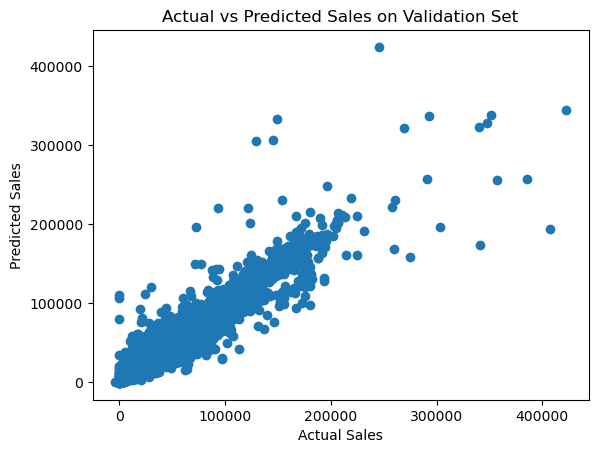

In [378]:
# Scatter plot of Actual vs Predicted values
plt.scatter(results_df['Actual_Sales'], results_df['Predicted_Sales'])
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales on Validation Set')
plt.show()

In [379]:
# Merge the sale_final and  final_df

df_finalSet  = final_df.drop('Date',axis = 1)

In [380]:
df_finalSet

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Week_Number,Day,Month,Year
0,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010
1,1,1,151315,38.51,2.548,4743.00,364.00,36.00,1176.00,2727.00,211.242170,8.106,1,6,12,2,2010
2,1,1,151315,39.93,2.514,4743.00,364.00,36.00,1176.00,2727.00,211.289143,8.106,0,7,19,2,2010
3,1,1,151315,46.63,2.561,4743.00,364.00,36.00,1176.00,2727.00,211.319643,8.106,0,8,26,2,2010
4,1,1,151315,46.50,2.625,4743.00,364.00,36.00,1176.00,2727.00,211.350143,8.106,0,9,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,182.000000,7.000,0,26,28,6,2013
8186,45,2,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,182.000000,7.000,0,27,5,7,2013
8187,45,2,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,182.000000,7.000,0,28,12,7,2013
8188,45,2,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,182.000000,7.000,0,29,19,7,2013


In [381]:
# The merge of the all data together df_finalSet and sale_final


overall_data = pd.merge( df_finalSet,sale_final, on= ['Store', 'Day','Month','Year'],how='inner')

overall_data

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Week_Number,Day,Month,Year,Dept,Weekly_Sales,IsHoliday_y
0,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010,1,24924.5000,False
1,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010,2,50605.2700,False
2,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010,3,13740.1200,False
3,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010,4,39954.0400,False
4,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,211.096358,8.106,0,5,5,2,2010,5,32229.3800,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.000000,7.000,0,30,26,7,2013,93,3504.0106,False
536630,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.000000,7.000,0,30,26,7,2013,94,3847.7851,False
536631,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.000000,7.000,0,30,26,7,2013,95,57535.2199,False
536632,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,182.000000,7.000,0,30,26,7,2013,97,7203.4642,False


In [382]:
overall_data.isna().sum()

Store           0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_x     0
Week_Number     0
Day             0
Month           0
Year            0
Dept            0
Weekly_Sales    0
IsHoliday_y     0
dtype: int64

In [383]:
overall_data.rename(columns = {'IsHoliday_x':'IsHoliday'}, inplace = True)
overall_data.drop(columns=['IsHoliday_y'],axis =1, inplace = True)
overall_data.columns

Index(['Store', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Week_Number', 'Day', 'Month', 'Year',
       'Dept', 'Weekly_Sales'],
      dtype='object')

In [384]:
overall_data.isna().value_counts()

Store  Type   Size   Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  CPI    Unemployment  IsHoliday  Week_Number  Day    Month  Year   Dept   Weekly_Sales
False  False  False  False        False       False      False      False      False      False      False  False         False      False        False  False  False  False  False           536634
dtype: int64

In [385]:
overall_data['Total_MarkDown'] = overall_data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)
overall_data['Expected_Sales'] = overall_data['Total_MarkDown'] + overall_data['Weekly_Sales']

In [386]:
final_dataset = overall_data
final_dataset

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales,Total_MarkDown,Expected_Sales
0,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,1,24924.5000,9046.00,33970.5000
1,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,2,50605.2700,9046.00,59651.2700
2,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,3,13740.1200,9046.00,22786.1200
3,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,4,39954.0400,9046.00,49000.0400
4,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,5,32229.3800,9046.00,41275.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,93,3504.0106,2941.26,6445.2706
536630,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,94,3847.7851,2941.26,6789.0451
536631,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,95,57535.2199,2941.26,60476.4799
536632,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,97,7203.4642,2941.26,10144.7242


In [387]:
final_dataset.to_csv('Cleaned_Data.csv', index = False)
view_once =pd.read_csv('Cleaned_Data.csv')
view_once

,Store,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Unemployment,IsHoliday,Week_Number,Day,Month,Year,Dept,Weekly_Sales,Total_MarkDown,Expected_Sales
0,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,1,24924.5000,9046.00,33970.5000
1,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,2,50605.2700,9046.00,59651.2700
2,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,3,13740.1200,9046.00,22786.1200
3,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,4,39954.0400,9046.00,49000.0400
4,1,1,151315,42.31,2.572,4743.00,364.00,36.00,1176.00,2727.00,...,8.106,0,5,5,2,2010,5,32229.3800,9046.00,41275.3800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536629,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,93,3504.0106,2941.26,6445.2706
536630,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,94,3847.7851,2941.26,6789.0451
536631,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,95,57535.2199,2941.26,60476.4799
536632,45,2,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,...,7.000,0,30,26,7,2013,97,7203.4642,2941.26,10144.7242


In [388]:
# Passing the Overall_data for the scikit-learn.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into features (X) and target variable (y)
#TargetColumnName = ['Store', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Weekly_Sales', 'Total_MarkDown', 'Expected_Sales']
TargetColumnName = ['Store', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Weekly_Sales', 'Total_MarkDown', 'Expected_Sales']
X = final_dataset.drop(TargetColumnName, axis=1)  # Replace 'TargetColumnName' with the actual name of your target variable
y = final_dataset[TargetColumnName]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Choose a regression model (e.g., Linear Regression)
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

# Save predictions to a separate file
#predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#predictions_df.to_csv('predictions.csv', index=False)



Mean Squared Error: 406891527.62275434
Root Mean Squared Error: 9480.886572078518
Mean Absolute Error: 7349.113526619485


In [308]:
# Random Forest Method 

# Assuming 'data' is your DataFrame with features and target variable

# Select features and target variable
#TargetColumnName = ['Store', 'Type', 'Size', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Weekly_Sales', 'Total_MarkDown', 'Expected_Sales']
X = final_dataset.drop('Temperature', axis=1)
y = final_dataset['Temperature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose the number of trees in the forest (n_estimators) and other hyperparameters
n_estimators = 100
max_depth = None  # You can adjust this based on your problem

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')

# Store predictions in a file
#predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#predictions_df.to_csv('predictions_rf.csv', index=False)


Mean Squared Error: 1.602649445153734e-05
Root Mean Squared Error: 0.004003310436568383
Mean Absolute Error: 0.0001449169361675178
